In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, f1_score, make_scorer
import ucimlrepo
from ucimlrepo import fetch_ucirepo


In [2]:
waveform_database_generator_version_1 = fetch_ucirepo(id=107)

X_waveform = waveform_database_generator_version_1.data.features
y_waveform = waveform_database_generator_version_1.data.targets

statlog_german_credit_data = fetch_ucirepo(id=144)

X_credit = statlog_german_credit_data.data.features
y_credit = statlog_german_credit_data.data.targets


# Statlog (German Credit Data)

In [3]:
# Load the German Credit dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
column_names = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 
    'Savings', 'Employment', 'InstallmentRate', 'PersonalStatus', 
    'OtherDebt', 'Residence', 'Property', 'Age', 'OtherInstallments', 
    'Housing', 'NumberExistingCredits', 'Job', 'NumberPeople', 'Telephone', 
    'ForeignWorker', 'Target'
]

# Read the dataset
data = pd.read_csv(url, header=None, names=column_names, delim_whitespace=True)

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=[
    'Status', 'CreditHistory', 'Purpose', 'Savings', 'Employment', 'PersonalStatus', 
    'OtherDebt', 'Property', 'OtherInstallments', 'Housing', 'Job', 'Telephone', 
    'ForeignWorker'
])

# Prepare the features (X) and target (Y)
Y = data_encoded['Target']
X = data_encoded.drop(['Target'], axis=1)

/var/folders/vq/sp8r9yc532j9qg7c016mgpth0000gn/T/ipykernel_47838/783019076.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, header=None, names=column_names, delim_whitespace=True)


In [5]:
# Function to evaluate the model using Holdout
def evaluate_holdout(X, Y, n_trials=5, criterion='gini'):
    results = []
    
    for _ in range(n_trials):
        # Holdout method: 90% train, 10% test
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=None)
        
        # Initialize the Decision Tree Classifier with the specified criterion
        clf = tree.DecisionTreeClassifier(criterion=criterion, max_depth=5)
        
        # Fit the model
        clf.fit(X_train, Y_train)
        
        # Make predictions
        Y_pred_test = clf.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(Y_test, Y_pred_test)
        precision = precision_score(Y_test, Y_pred_test, average='weighted')
        f1 = f1_score(Y_test, Y_pred_test, average='weighted')
        
        results.append({'Accuracy': accuracy, 'Precision': precision, 'F1-Score': f1})
    
    results_df = pd.DataFrame(results)
    averages = results_df.mean().to_frame().T
    averages['Trial'] = 'Average'
    results_df = pd.concat([results_df, averages], ignore_index=True)
    
    return results_df

# Function to evaluate the model using Cross-validation
def evaluate_cross_validation(X, Y, criterion='gini'):
    clf = tree.DecisionTreeClassifier(criterion=criterion, max_depth=5)
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }
    
    cv_results = cross_validate(clf, X, Y, cv=10, scoring=scoring)
    
    results_df = pd.DataFrame({
        'Accuracy': cv_results['test_accuracy'],
        'Precision': cv_results['test_precision'],
        'F1-Score': cv_results['test_f1']
    })
    
    averages = results_df.mean().to_frame().T
    averages['Trial'] = 'Average'
    results_df = pd.concat([results_df, averages], ignore_index=True)

    return results_df


# Part 1 & 2

Results for Part I - Holdout Method (Gini):
   Accuracy  Precision  F1-Score    Trial
0     0.650   0.631908  0.639443      NaN
1     0.690   0.672174  0.672011      NaN
2     0.670   0.723083  0.685887      NaN
3     0.690   0.681431  0.685094      NaN
4     0.690   0.674133  0.678552      NaN
5     0.678   0.676546  0.672197  Average


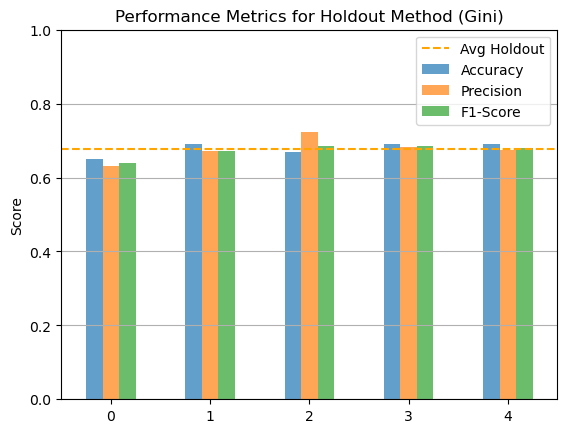


Results for Part II - Holdout Method (Entropy):
   Accuracy  Precision  F1-Score    Trial
0     0.750   0.733902  0.711536      NaN
1     0.690   0.709612  0.698177      NaN
2     0.710   0.686375  0.692010      NaN
3     0.730   0.712774  0.693806      NaN
4     0.640   0.653011  0.645536      NaN
5     0.704   0.699135  0.688213  Average


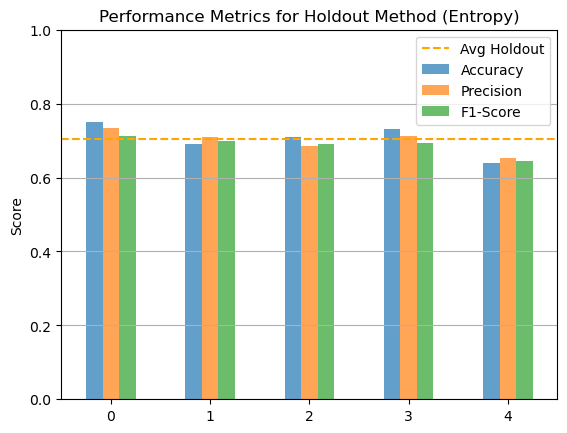


Results for Part I - Cross-Validation (Gini):
    Accuracy  Precision  F1-Score    Trial
0       0.74   0.731185  0.734325      NaN
1       0.68   0.607065  0.609097      NaN
2       0.73   0.707796  0.704130      NaN
3       0.75   0.733877  0.726046      NaN
4       0.69   0.650588  0.653333      NaN
5       0.75   0.733877  0.726046      NaN
6       0.68   0.656876  0.664033      NaN
7       0.71   0.702131  0.705410      NaN
8       0.66   0.603654  0.615618      NaN
9       0.71   0.681715  0.682214      NaN
10      0.71   0.680876  0.682025  Average


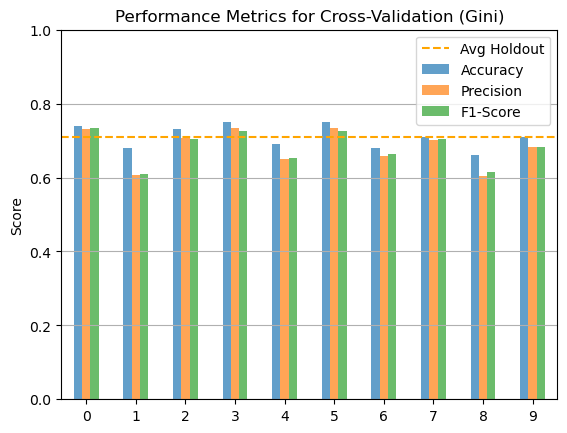


Results for Part II - Cross-Validation (Entropy):
    Accuracy  Precision  F1-Score    Trial
0       0.73   0.727489  0.728669      NaN
1       0.70   0.675000  0.680000      NaN
2       0.71   0.678824  0.675699      NaN
3       0.71   0.712810  0.711334      NaN
4       0.67   0.642495  0.650849      NaN
5       0.63   0.612000  0.619561      NaN
6       0.72   0.720000  0.720000      NaN
7       0.75   0.743531  0.746043      NaN
8       0.68   0.639583  0.645850      NaN
9       0.70   0.670732  0.674342      NaN
10      0.70   0.682246  0.685235  Average


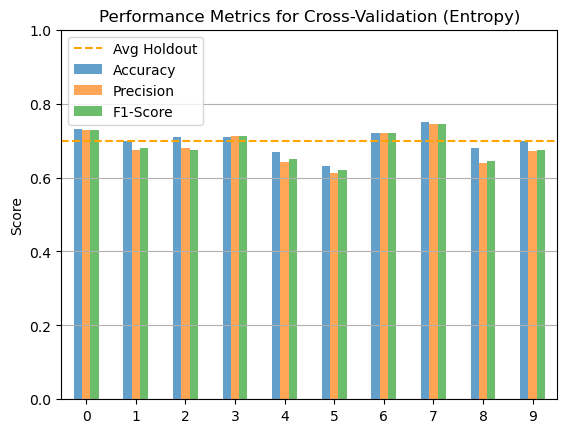

<Figure size 1000x500 with 0 Axes>

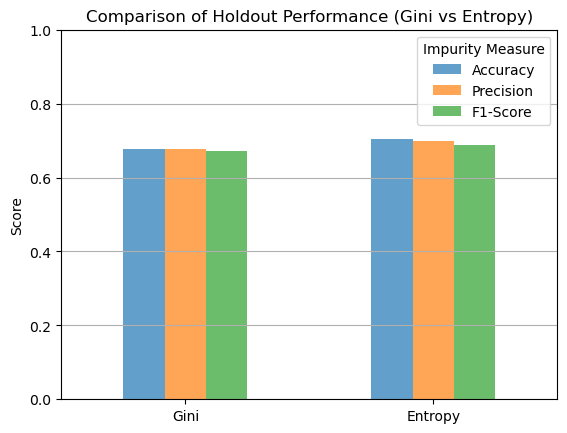

In [5]:
# Part I: Evaluate Holdout Method using Gini impurity
holdout_results_gini = evaluate_holdout(X, Y, criterion='gini')

# Print results for Part I
print("Results for Part I - Holdout Method (Gini):")
print(holdout_results_gini)

# Plotting Part I Holdout results for Gini
def plot_results(df, title):
    df.set_index(df.index)[['Accuracy', 'Precision', 'F1-Score']].iloc[:-1].plot(kind='bar', alpha=0.7)
    plt.title(title)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.axhline(y=df.iloc[-1]['Accuracy'], color='orange', linestyle='--', label='Avg Holdout')
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()

plot_results(holdout_results_gini, 'Performance Metrics for Holdout Method (Gini)')

# Part I: Evaluate Holdout Method using Entropy impurity
holdout_results_entropy = evaluate_holdout(X, Y, criterion='entropy')

print("\nResults for Part II - Holdout Method (Entropy):")
print(holdout_results_entropy)

# Plotting Part I Holdout results for Entropy
plot_results(holdout_results_entropy, 'Performance Metrics for Holdout Method (Entropy)')

# Part I: Evaluate Cross-validation using Gini impurity
cv_results_gini = evaluate_cross_validation(X, Y, criterion='gini')

print("\nResults for Part I - Cross-Validation (Gini):")
print(cv_results_gini)

# Plotting Part I Cross-Validation results for Gini
plot_results(cv_results_gini, 'Performance Metrics for Cross-Validation (Gini)')

# Part I: Evaluate Cross-validation using Entropy impurity
cv_results_entropy = evaluate_cross_validation(X, Y, criterion='entropy')

print("\nResults for Part II - Cross-Validation (Entropy):")
print(cv_results_entropy)

# Plotting Part I Cross-Validation results for Entropy
plot_results(cv_results_entropy, 'Performance Metrics for Cross-Validation (Entropy)')

# Comparative plot for Part I Holdout Performance (Gini vs Entropy)
def plot_holdout_comparison(df_gini, df_entropy, title):
    plt.figure(figsize=(10, 5))
    
    # Prepare DataFrames for comparison
    gini_avg = df_gini.iloc[-1][['Accuracy', 'Precision', 'F1-Score']].rename("Gini")
    entropy_avg = df_entropy.iloc[-1][['Accuracy', 'Precision', 'F1-Score']].rename("Entropy")
    
    comparison_df = pd.concat([gini_avg, entropy_avg], axis=1).T
    comparison_df.plot(kind='bar', alpha=0.7)
    
    plt.title(title)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.legend(title='Impurity Measure')
    plt.show()

# Plotting the comparison of Holdout performance
plot_holdout_comparison(holdout_results_gini, holdout_results_entropy, 'Comparison of Holdout Performance (Gini vs Entropy)')

# Comparative plot for Part I and II Cross-Validation performance
def plot_comparison(part1_df, part2_df, title):
    plt.figure(figsize=(10, 5))
    
    # Prepare DataFrames for comparison
    part1_avg = part1_df.iloc[-1][['Accuracy', 'Precision', 'F1-Score']].rename("Gini")
    part2_avg = part2_df.iloc[-1][['Accuracy', 'Precision', 'F1-Score']].rename("Entropy")
    
    comparison_df = pd.concat([part1_avg, part2_avg], axis=1).T
    comparison_df.plot(kind='bar', alpha=0.7)
    
    plt.title(title)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.legend(title='Impurity Measure')
    plt.show()


# Part 3

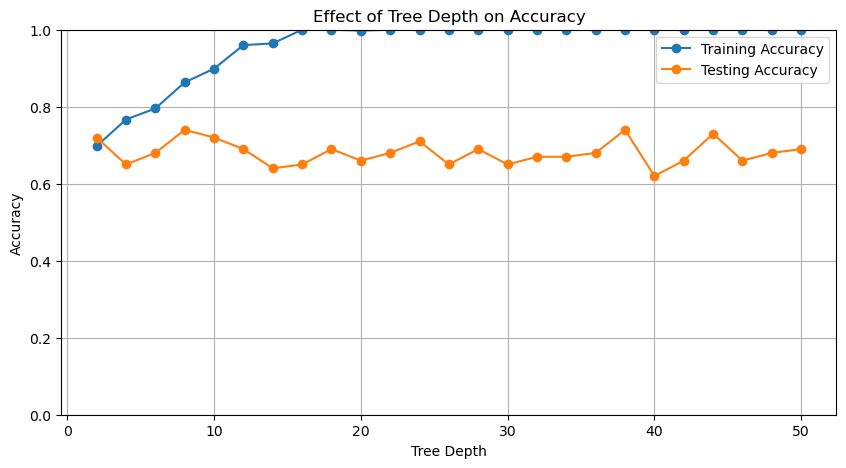

In [6]:
depths = range(2, 51, 2)
train_accuracies = []
test_accuracies = []

for depth in depths:
    # Holdout method: 90% train, 10% test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=None)
    
    # Initialize the Decision Tree Classifier with varying depth
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    
    # Fit the model
    clf.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(Y_train, Y_pred_train)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the effect of tree depth
plt.figure(figsize=(10, 5))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Effect of Tree Depth on Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()
